In [1]:
%load_ext autoreload
%autoreload 2

# Saliency Prediction

The task is to create a model that effectively predicts fixation points on a visual scene.
(This should not be confused with the saliency detection task, which is an extraction of areas on a visual scene, that are relevant to a given task.)

We use the CAT2000 dataset, which, as the authors say, is composed to create better models for saliency prediction. It diversified the then datasets with better resolution data, various categories, and of course more data. This collection consists of 4000 photos, 2000/2000 training/test, which are divided into 20 equinumerous categories such as Action, Social, Line drawings, Objects, etc. Along with the photos are attached, maps of fixation, which represent what parts of the presented images these people watched. A description of the aforementioned dataset can be found under  https://arxiv.org/pdf/1505.03581.pdf

![alt text](cat2000.png "Cat2000 Sample")

As a model, we decided to implement the model presented in the paper https://arxiv.org/pdf/1609.01064.pdf
which is a model of neural networks, with fully convolutional layers, using the features of different layers, in order to efficiently predict saliency maps. This model also uses the concept of prior, which is a way to define regularities in visual perception. In their model, it is fully learned and integrated, at the last stage, with the features of the image extracted.

![alt text](mlnet.png "MLNet Scheme")

In our experiment, the input is (480, 640) and the output is (60, 80), so we could set batch_size = 16 using a GeForce GTX 1060 Ti 6GB graphics card. We set the training to 100 epoch. We decided to draw one photo from each category, excluding it from the training and validation process, to check after each epoch what the saliency map looks like for this photo. The course of training and the final comparison can be viewed below.

In [2]:
from data import Cat2000Loader
from model import MLNet
from loss import ModMSELoss
from trainer import Trainer

In [3]:
# Create loaders
import torch
from torchvision.transforms import Compose, Resize, ToTensor

ratio = 1080/1920
width = 1280
image_size = (int(width*ratio) , width)
# image_size = (480, 640)
fix_map_size = (image_size[0] // 8, image_size[1] // 8)
prior_size = (fix_map_size[0] // 10, fix_map_size[1] // 10)

transform1 = Compose([Resize(image_size), ToTensor()])
transform2 = Compose([Resize(fix_map_size), ToTensor()])

loaders = Cat2000Loader('cat2000', batch_size=5, transform=transform1, target_transform=transform2)

In [4]:
# Prepare model
model = MLNet(prior_size)

criterion = ModMSELoss(*fix_map_size)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3,weight_decay=0.0005,momentum=0.9,nesterov=True)

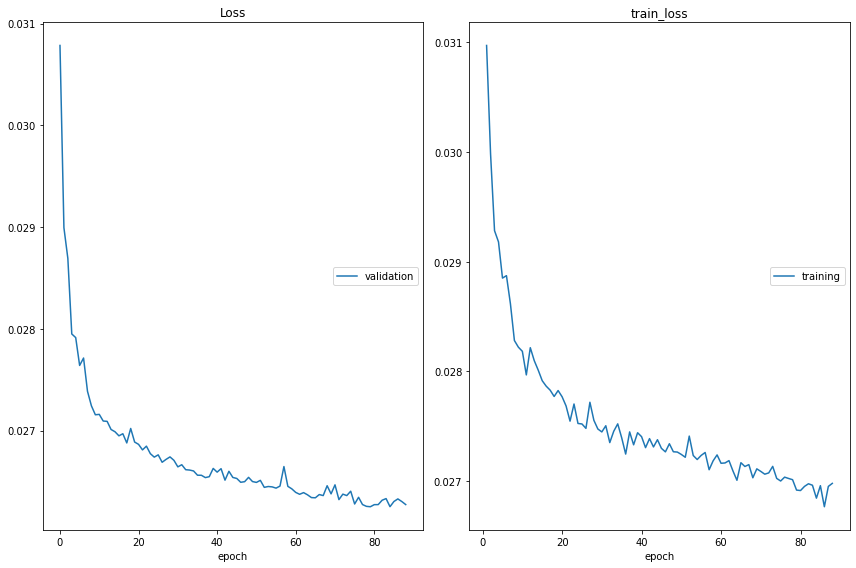

  0%|          | 0/317 [00:00<?, ?it/s]

Loss
	validation       	 (min:    0.026, max:    0.031, cur:    0.026)
train_loss
	training         	 (min:      nan, max:      nan, cur:    0.027)


  0%|          | 1/317 [00:02<10:47,  2.05s/it]

loss on the given batch: 0.0333


  3%|▎         | 11/317 [00:18<10:21,  2.03s/it]

loss on the given batch: 0.0293


  7%|▋         | 21/317 [00:34<10:04,  2.04s/it]

loss on the given batch: 0.0261


 10%|▉         | 31/317 [00:50<09:44,  2.04s/it]

loss on the given batch: 0.0228


 13%|█▎        | 41/317 [01:06<09:25,  2.05s/it]

loss on the given batch: 0.0267


 16%|█▌        | 51/317 [01:22<09:02,  2.04s/it]

loss on the given batch: 0.0258


 19%|█▉        | 61/317 [01:38<08:43,  2.05s/it]

loss on the given batch: 0.0270


 22%|██▏       | 71/317 [01:54<08:21,  2.04s/it]

loss on the given batch: 0.0267


 26%|██▌       | 81/317 [02:10<08:02,  2.05s/it]

loss on the given batch: 0.0238


 29%|██▊       | 91/317 [02:26<07:39,  2.03s/it]

loss on the given batch: 0.0200


 32%|███▏      | 101/317 [02:42<07:17,  2.03s/it]

loss on the given batch: 0.0314


 35%|███▌      | 111/317 [02:58<07:00,  2.04s/it]

loss on the given batch: 0.0276


 38%|███▊      | 121/317 [03:14<06:39,  2.04s/it]

loss on the given batch: 0.0338


 41%|████▏     | 131/317 [03:30<06:19,  2.04s/it]

loss on the given batch: 0.0281


 44%|████▍     | 141/317 [03:46<05:59,  2.05s/it]

loss on the given batch: 0.0228


 48%|████▊     | 151/317 [04:02<05:38,  2.04s/it]

loss on the given batch: 0.0346


 51%|█████     | 161/317 [04:18<05:15,  2.02s/it]

loss on the given batch: 0.0289


 54%|█████▍    | 171/317 [04:34<04:56,  2.03s/it]

loss on the given batch: 0.0304


 57%|█████▋    | 181/317 [04:50<04:36,  2.04s/it]

loss on the given batch: 0.0254


 60%|██████    | 191/317 [05:06<04:15,  2.03s/it]

loss on the given batch: 0.0217


 63%|██████▎   | 201/317 [05:22<03:54,  2.02s/it]

loss on the given batch: 0.0352


 67%|██████▋   | 211/317 [05:38<03:35,  2.03s/it]

loss on the given batch: 0.0333


 70%|██████▉   | 221/317 [05:54<03:13,  2.02s/it]

loss on the given batch: 0.0220


 73%|███████▎  | 231/317 [06:10<02:53,  2.02s/it]

loss on the given batch: 0.0224


 76%|███████▌  | 241/317 [06:25<02:33,  2.02s/it]

loss on the given batch: 0.0263


 79%|███████▉  | 251/317 [06:41<02:13,  2.02s/it]

loss on the given batch: 0.0254


 82%|████████▏ | 261/317 [06:57<01:53,  2.03s/it]

loss on the given batch: 0.0164


 85%|████████▌ | 271/317 [07:13<01:32,  2.02s/it]

loss on the given batch: 0.0275


 89%|████████▊ | 281/317 [07:29<01:12,  2.02s/it]

loss on the given batch: 0.0238


 92%|█████████▏| 291/317 [07:45<00:52,  2.02s/it]

loss on the given batch: 0.0175


 94%|█████████▍| 298/317 [07:55<00:29,  1.55s/it]

In [ ]:
# Train
trainer = Trainer(model, criterion, optimizer, loaders)

trainer.run_trainer(1000)

The graph shows that the measure on the validation (Loss) set has a downward trend, so further training (with better computing resources) could give a better final result. The loss function is transferred directly from the one of the author of the paper who posted their implementations, using the Keras library, at https://github.com/marcellacornia/mlnet.
The plot starts around the fifth epoch because the model initially returned a zero-filled tensor for some examples, which was a problem when computing said loss function.

In [ ]:
# Save model
import datetime

full_path = 'models/' + str(datetime.datetime.now()) + '_' + '.basic_model'
torch.save(model.state_dict(), full_path)

### Display

We noticed that the model initially returns the specified image features, similar to the saliency detection task. Over time, the result starts to blur as it goes towards the fixation points, and sometimes focuses entirely on listing important features in the image.<br>
We have presented the result every tenth epoch, starting with epoch number 9.

In [ ]:
from utils import display_evolution

In [ ]:
display_evolution()